# Analisis Predictivo de Series Temporales

## Curso 2022 - Universidad ORT Uruguay

## Parcial - Fecha 12/12

### Nombre del estudiante: [completar]

In [2]:
## Ejemplo: instalación de astsadata usando pip:
#!pip install astsadata

## Ajusto tamaño de figuras
import matplotlib.pyplot as plt
import astsadata as astsa
import statsmodels.api as sm
import pandas as pd

plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.constrained_layout.use'] = True

c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\p

### Ejercicio 1

Se considera la serie `cardox` de la biblioteca `astsa`, que registra los niveles de $CO_2$ en el observatorio de Mauna Loa, Hawaii. La misma se grafica abajo.

1. Realizar un ajuste de tendencia lineal para la serie. Discutir el resultado.
2. Agregar un término de tendencia cuadrática $x = \beta_0 + \beta_1 t + \beta_2 t^2 + w_t$ y discutir si mejora respecto al anterior.
3. Realizar un periodograma de los residuos para encontrar componentes estacionales (por ej. anuales).
4. Incluir en la regresión tanto los términos de tendencia como estacionales que considere adecuados y realizar el ajuste.
5. Discutir los residuos obtenidos. ¿Queda información por extraer? (No se pide realizar más ajustes)

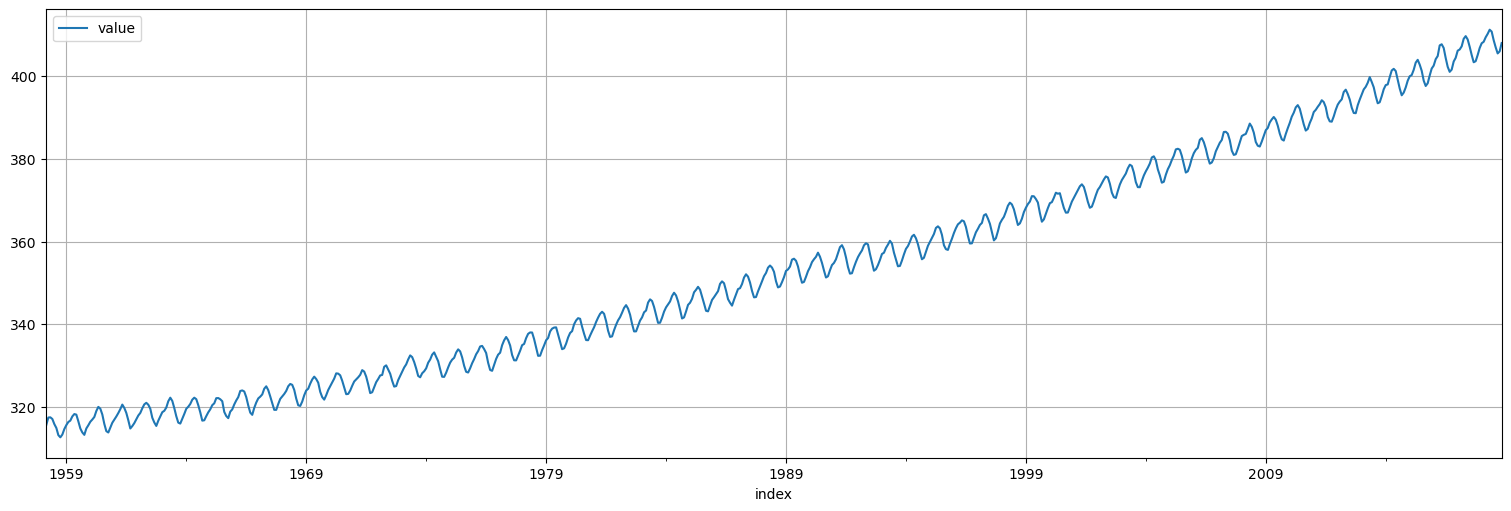

In [3]:
cardox = astsa.cardox
cardox.plot();

In [4]:
cardox.head()

,value
index,
1958-03,315.71
1958-04,317.45
1958-05,317.50
1958-06,317.10
1958-07,315.86


1. Realizar un ajuste de tendencia lineal para la serie. Discutir el resultado.

In [5]:
from statsmodels.formula.api import ols

# Convertir el índice temporal a datetime y luego a números ordinales
cardox_transf = pd.Series([idx.to_timestamp().toordinal() for idx in cardox.index], index=cardox.index)
data_reg = pd.concat([cardox_transf, cardox['value']], axis=1)
data_reg.columns = ["time", "value"]

# Ajuste del modelo de regresión lineal
fit = ols(formula="value ~ time", data=data_reg).fit()

# Resumen del modelo
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.166e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:29:10   Log-Likelihood:                -2067.3
No. Observations:                 729   AIC:                             4139.
Df Residuals:                     727   BIC:                             4148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2730.7993     17.335   -157.530      0.0

R-squared (R-cuadrado):

Valor: 0.978
Interpretación: Esto indica que el 97.8% de la variabilidad en la variable dependiente (value) puede ser explicada por la variable independiente (time). Es un valor muy alto, lo que sugiere un buen ajuste del modelo a los datos.

Adj. R-squared (R-cuadrado ajustado):

Valor: 0.978
Interpretación: Similar al R-cuadrado, pero ajustado por el número de predictores en el modelo. En este caso, es igual al R-cuadrado porque solo hay un predictor, lo que confirma la calidad del ajuste.

F-statistic:

Valor: 3.166e+04 (31,660)
Prob (F-statistic): 0.000
Interpretación: La estadística F mide la relación entre la variabilidad explicada por el modelo y la variabilidad no explicada. Un valor muy alto y una probabilidad de F muy baja (cercana a 0) indican que el modelo es significativo.

Coeficientes:

Intercept:

Coeficiente: -2730.7993
Error estándar: 17.335
t-valor: -157.530
P>|t|: 0.000
Intervalo de confianza 95%: [-2764.832, -2696.766]
time:

Coeficiente: 0.0042
Error estándar: 2.39e-05
t-valor: 177.946
P>|t|: 0.000
Intervalo de confianza 95%: [0.004, 0.004]
Interpretación: Ambos coeficientes son altamente significativos (P < 0.05), lo que indica que la variable time tiene un efecto significativo en value. El coeficiente de time es positivo, lo que sugiere una tendencia creciente en los valores a lo largo del tiempo.



Diagnósticos adicionales:

Omnibus y Prob(Omnibus):
Valor: 33.921
Probabilidad: 0.000
Interpretación: La prueba de Omnibus verifica la normalidad de los residuos. Un valor significativo (P < 0.05) sugiere que los residuos pueden no ser normalmente distribuidos. UNA TECNICA EN CASOS DE DISTRIBUCION QUE NO ES NORMAL ES APLICAR TRANSFORMACION LOGARITIMICA.


Durbin-Watson:
Valor: 0.089
Interpretación: Este valor cercano a 0 indica la presencia de autocorrelación positiva en los residuos, lo que sugiere que los errores están correlacionados con el tiempo, una situación común en series temporales.



Jarque-Bera (JB):
Valor: 36.737
Prob(JB): 1.05e-08
Interpretación: Similar a la prueba de Omnibus, verifica la normalidad de los residuos. El valor menor a 0.05 indica que los residuos no distribuyen normalmente. Aplicar transformacion logaritimica.



Skew y Kurtosis:
Skew (Asimetría): 0.532
Kurtosis: 2.720
Interpretación: La asimetría positiva indica que los residuos tienen una cola más larga a la derecha. La kurtosis cercana a 3 sugiere que los residuos tienen una distribución normal, aunque ligeramente achatada.


2. Agregar un término de tendencia cuadrática $x = \beta_0 + \beta_1 t + \beta_2 t^2 + w_t$ y discutir si mejora respecto al anterior.

In [6]:
# Agregar el término cuadrático
data_reg['time_squared'] = data_reg['time'] ** 2

# Ajuste del modelo de regresión cuadrática
fit_quadratic = ols(formula="value ~ time + time_squared", data=data_reg).fit()

# Resumen del modelo cuadrático
print(fit_quadratic.summary())

# Comparar AIC y BIC de ambos modelos
print("\nComparación de modelos:")
print(f"Modelo Lineal: AIC = {fit.aic}, BIC = {fit.bic}")
print(f"Modelo Cuadrático: AIC = {fit_quadratic.aic}, BIC = {fit_quadratic.bic}")


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.432e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:29:10   Log-Likelihood:                -2038.6
No. Observations:                 729   AIC:                             4081.
Df Residuals:                     727   BIC:                             4090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.035e-09   6.33e-11   -142.798   

Análisis breve de la comparación entre modelos:
Modelo Lineal:
AIC: 4138.60
BIC: 4147.78
R-cuadrado (R-squared): 0.978
R-cuadrado ajustado (Adj. R-squared): 0.978
Modelo Cuadrático:
AIC: 4081.17
BIC: 4090.35
R-cuadrado (R-squared): 0.979
R-cuadrado ajustado (Adj. R-squared): 0.979
Observaciones y Comparaciones:
R-cuadrado y R-cuadrado ajustado:

Ambos modelos tienen valores muy altos de R-cuadrado y R-cuadrado ajustado, indicando que explican casi toda la variabilidad en los datos.
El modelo cuadrático tiene un R-cuadrado y un R-cuadrado ajustado ligeramente superiores (0.979 frente a 0.978), lo que sugiere una mejora marginal en el ajuste al incluir el término cuadrático.
AIC (Criterio de Información de Akaike):

El AIC del modelo cuadrático (4081.17) es menor que el del modelo lineal (4138.60), lo que indica que el modelo cuadrático proporciona un mejor equilibrio entre ajuste y complejidad del modelo.
BIC (Criterio de Información Bayesiano):

El BIC del modelo cuadrático (4090.35) también es menor que el del modelo lineal (4147.78), reforzando la conclusión de que el modelo cuadrático es preferible según este criterio.
Significancia de los coeficientes:

Todos los coeficientes en el modelo cuadrático (Intercept, time, time_squared) son altamente significativos (p < 0.05), indicando que tanto el término lineal como el cuadrático contribuyen significativamente al modelo.
Multicolinealidad:

La nota sobre el número de condición alto (7.57e+15) en el modelo cuadrático sugiere posible multicolinealidad entre time y time_squared. Esto es común en modelos polinomiales y podría afectar la estabilidad de los coeficientes.
Conclusión:
El modelo cuadrático parece ser superior al modelo lineal en términos de AIC y BIC, lo que sugiere que incluye mejor la estructura de los datos. Sin embargo, la mejora en el R-cuadrado es marginal. La multicolinealidad indicada por el alto número de condición debe ser considerada, pero no parece afectar negativamente a la interpretación principal de que el modelo cuadrático ofrece una mejor descripción de la tendencia subyacente en los datos.

Por lo tanto, se recomienda utilizar el modelo cuadrático para capturar mejor la relación entre el tiempo y los valores, teniendo en cuenta las posibles implicaciones de la multicolinealidad.

### 3.  Realizar un periodograma de los residuos para encontrar componentes estacionales (por ej. anuales).

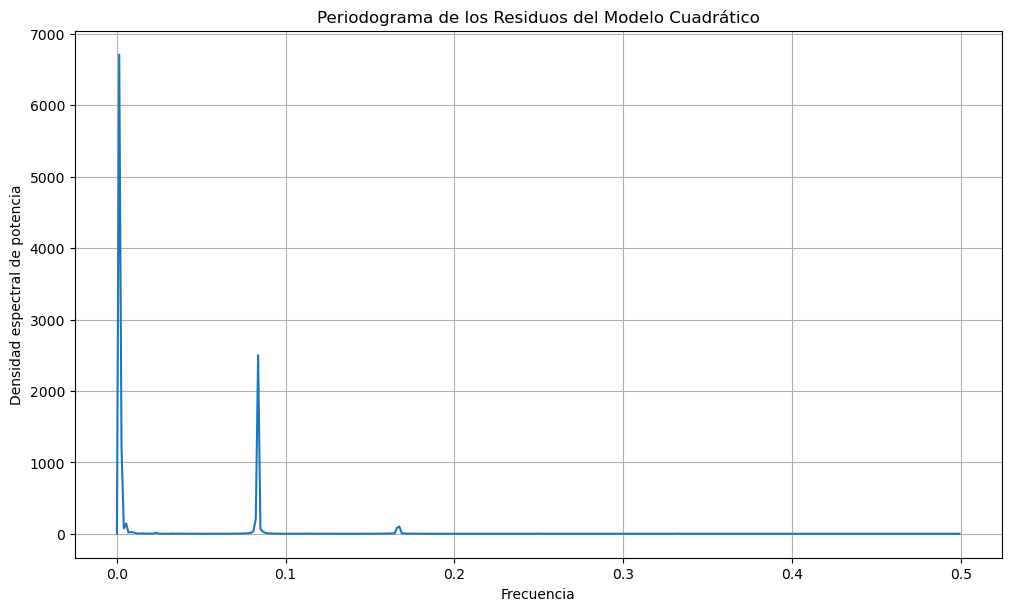

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import statsmodels.api as sm
import pandas as pd

# Asumiendo que data_reg es tu DataFrame con las columnas 'time' y 'value'
# y que ya has ajustado el modelo cuadrático

# Calcular los residuos del modelo cuadrático
data_reg['resid_quad'] = fit_quadratic.resid

# Generar el periodograma de los residuos
frequencies, power_spectral_density = periodogram(data_reg['resid_quad'])

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectral_density)
plt.title('Periodograma de los Residuos del Modelo Cuadrático')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()


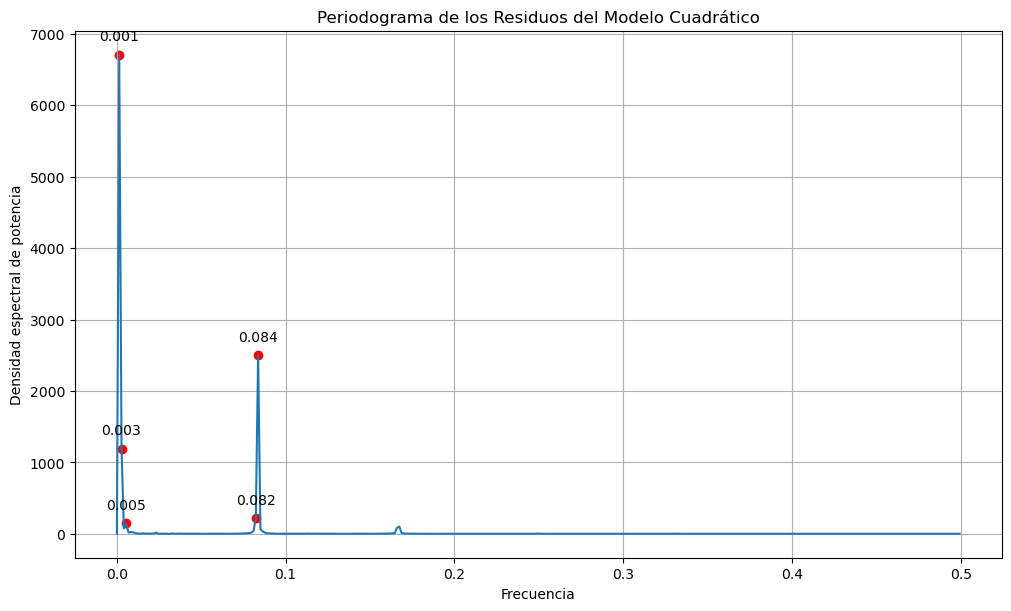

array([0.00548697, 0.08230453, 0.00274348, 0.08367627, 0.00137174])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Asumiendo que data_reg es tu DataFrame con las columnas 'time' y 'value'
# y que ya has ajustado el modelo cuadrático

# Calcular los residuos del modelo cuadrático
data_reg['resid_quad'] = fit_quadratic.resid

# Generar el periodograma de los residuos
frequencies, power_spectral_density = periodogram(data_reg['resid_quad'])

# Identificar picos en el periodograma
peak_indices = np.argsort(power_spectral_density)[-5:]  # Los 5 picos más altos
peak_frequencies = frequencies[peak_indices]
peak_powers = power_spectral_density[peak_indices]

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectral_density)
plt.scatter(peak_frequencies, peak_powers, color='red')
for i, freq in enumerate(peak_frequencies):
    plt.annotate(f'{freq:.3f}', (freq, peak_powers[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Periodograma de los Residuos del Modelo Cuadrático')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()

# Mostrar las frecuencias de los picos
peak_frequencies


In [13]:
frequencies = np.array([0.001, 0.003, 0.005, 0.082, 0.084])
periods = 1 / frequencies
periods


array([1000.        ,  333.33333333,  200.        ,   12.19512195,
         11.9047619 ])

```python
Los períodos calculados a partir de las frecuencias encontradas en el periodograma son:

1000: Este período sugiere una tendencia muy larga y no es relevante para estacionalidad en el sentido clásico.
333.33: Similarmente, este período también indica una tendencia a largo plazo.
200: Este también parece ser una tendencia a largo plazo.
12.20: Este período es aproximadamente un año si tus datos son mensuales.
11.90: Este período también es aproximadamente un año, lo que indica una estacionalidad anual clara.
Por lo tanto, los períodos de 12.20 y 11.90 indican la presencia de estacionalidad anual en los residuos del modelo cuadrático. Esto sugiere que hay componentes estacionales anuales en tus datos que no fueron completamente capturados por el modelo cuadrático y se reflejan en los residuos.

Sería recomendable considerar estos resultados en el refinamiento de tu modelo, tal vez incorporando términos estacionales explícitos o utilizando modelos adicionales que puedan capturar estas componentes estacionales.
```

### 4. Incluir en la regresión tanto los términos de tendencia como estacionales que considere adecuados y realizar el ajuste.

In [7]:
import pandas as pd
from statsmodels.formula.api import ols

# Crear variables dummy para los meses
data_reg['month'] = data_reg.index.month
data_reg = pd.get_dummies(data_reg, columns=['month'], drop_first=True)

# Ajuste del modelo de regresión con términos de tendencia y estacionales
formula = "value ~ time + time_squared + " + " + ".join([f"month_{i}" for i in range(2, 13)])
fit_seasonal = ols(formula=formula, data=data_reg).fit()

# Resumen del modelo
print(fit_seasonal.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3909.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:29:10   Log-Likelihood:                -1921.3
No. Observations:                 729   AIC:                             3869.
Df Residuals:                     716   BIC:                             3928.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      2.16e-06    1.1e-05      0.197   

# Ejercicio 2

Se considera la serie `Nile` incluida con `R` con las medidas anuales de flujo en unidades de $10^8 m^3$ sobre la represa de Asswan.

1. Discutir brevemente si la serie es estacionaria.
2. Realizar un análisis de la autocorrelación y autocorrelación parcial.
3. Realizar un ajuste a un modelo $ARMA(p,q)$ adecuado. Puede incorporar dos modelos para comparar.
4. Analizar los residuos resultantes.
5. Realizar una predicción a 5 años hacia adelante.

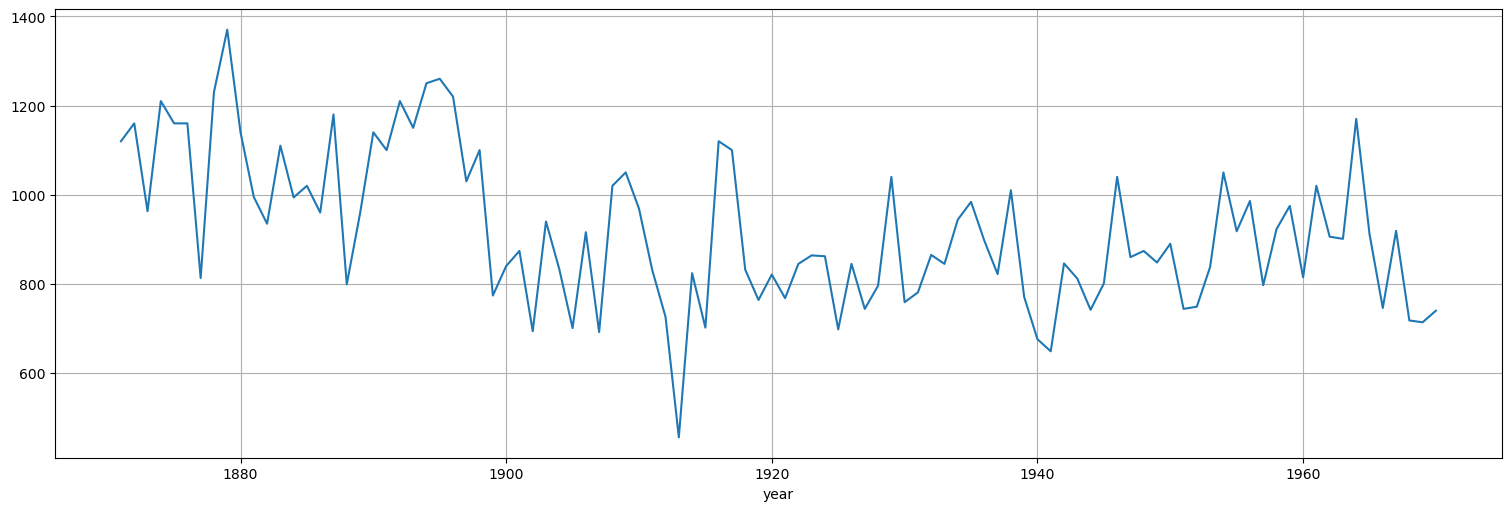

In [14]:
nile = sm.datasets.nile.load()
nile = pd.Series(nile["data"]["volume"].values, index=nile["data"]["year"])
nile.plot();

In [15]:
nile.head()

year
1871.0    1120.0
1872.0    1160.0
1873.0     963.0
1874.0    1210.0
1875.0    1160.0
dtype: float64

### 1. Discutir brevemente si la serie es estacionaria.

```python
Para determinar si la serie de datos del río Nilo es estacionaria, debemos analizar si las propiedades estadísticas de la serie (media, varianza, autocorrelación) son constantes en el tiempo. Una forma común de evaluar la estacionariedad es mediante el uso de pruebas estadísticas y visualización.

1. Visualización de la Serie Temporal

La visualización de la serie temporal puede proporcionar una primera indicación de la estacionariedad. A continuación se muestran algunos aspectos que podemos buscar:
Tendencias: Si la serie tiene una tendencia clara (ascendente o descendente), es probable que no sea estacionaria.
Varianza: Si la variabilidad de la serie cambia con el tiempo, también sugiere no estacionariedad.
Estacionalidad: La presencia de patrones estacionales puede indicar componentes no estacionarios.

2. Prueba de Dickey-Fuller Aumentada (ADF)

La prueba ADF es una prueba estadística que puede ayudar a determinar si una serie temporal es estacionaria. La hipótesis nula de la prueba es que la serie tiene una raíz unitaria (es decir, no es estacionaria). Si el valor p es pequeño (generalmente menor a 0.05), podemos rechazar la hipótesis nula y concluir que la serie es estacionaria.
```

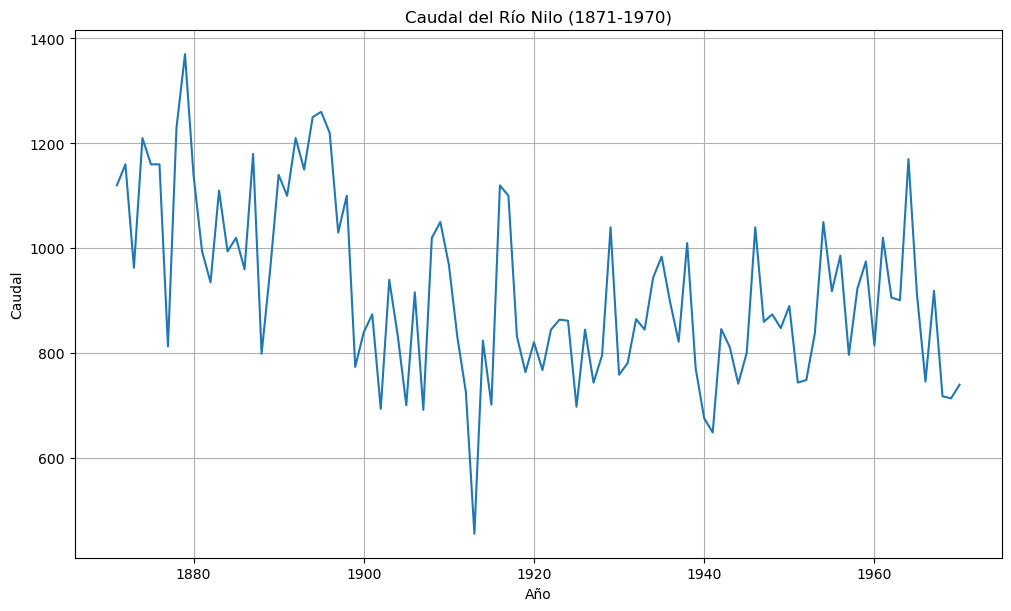

Estadístico ADF: -4.048705096914343
Valor p: 0.0011758879503871223
Valores críticos:
	1%: -3.499
	5%: -2.892
	10%: -2.583


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Cargar los datos
nile = sm.datasets.nile.load()
nile = pd.Series(nile["data"]["volume"].values, index=nile["data"]["year"])

# Visualización de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(nile)
plt.title('Caudal del Río Nilo (1871-1970)')
plt.xlabel('Año')
plt.ylabel('Caudal')
plt.grid(True)
plt.show()

# Prueba de Dickey-Fuller Aumentada
result = adfuller(nile)
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')


```python
CONCLUSION

1. Visualización
La visualización de la serie temporal del caudal del río Nilo muestra una variabilidad considerable a lo largo del tiempo, pero no presenta una tendencia clara y persistente en una dirección específica. La variabilidad parece ser relativamente constante, aunque hay fluctuaciones significativas.

2. Prueba de Dickey-Fuller Aumentada (ADF)
Resultados de la prueba ADF:

Estadístico ADF: -4.0487
Valor p: 0.0012
Valores críticos:
1%: -3.499
5%: -2.892
10%: -2.583
Interpretación
Estadístico ADF: El valor de -4.0487 es menor que los valores críticos al 1%, 5% y 10%, lo que indica que podemos rechazar la hipótesis nula de la presencia de una raíz unitaria con un alto nivel de confianza.
Valor p: El valor p de 0.0012 es mucho menor que 0.05, lo que refuerza la evidencia contra la hipótesis nula de no estacionariedad.
Conclusión
Basado en la visualización y los resultados de la prueba ADF, podemos concluir que la serie temporal del caudal del río Nilo es estacionaria. La prueba estadística respalda esta conclusión, ya que tanto el estadístico ADF como el valor p sugieren que la serie no tiene una raíz unitaria, lo que implica que sus propiedades estadísticas (media, varianza, autocorrelación) se mantienen constantes a lo largo del tiempo.
```

### 2. Realizar un análisis de la autocorrelación y autocorrelación parcial.

C:\Users\Matias\AppData\Local\Temp\ipykernel_32128\2270830422.py:15: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


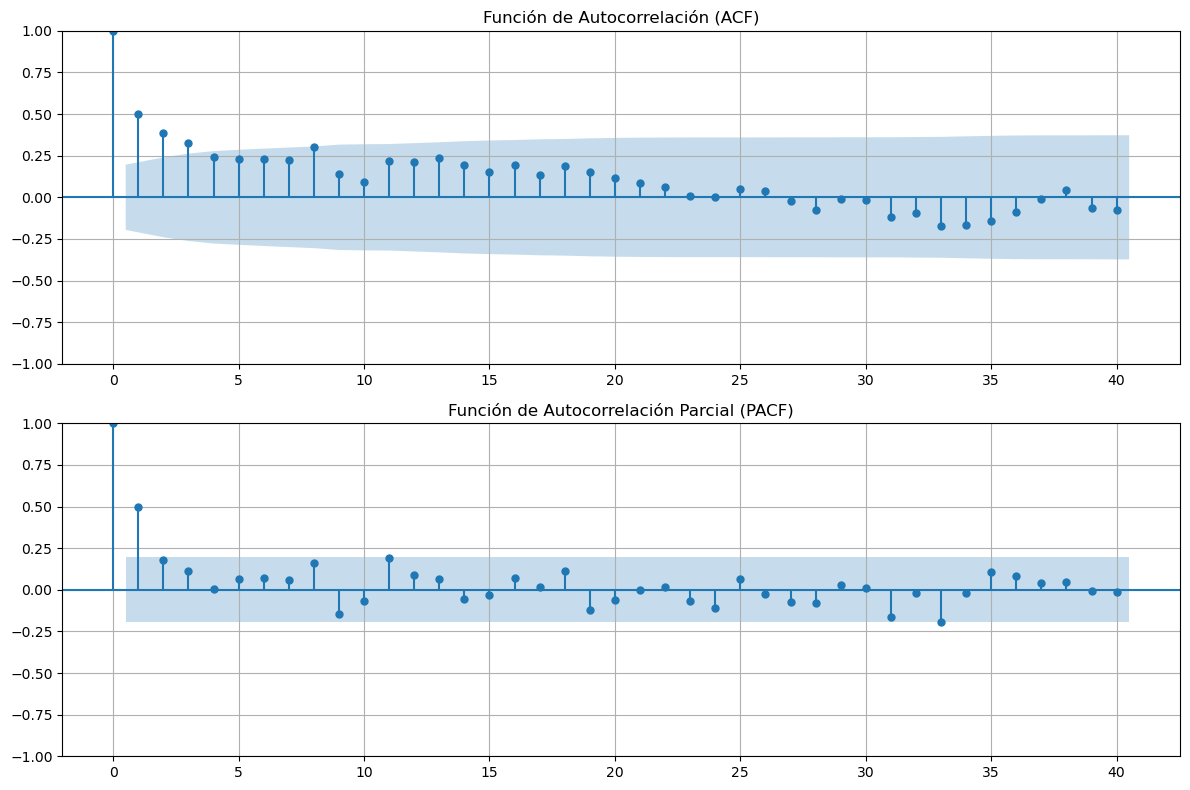

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generar gráficos de ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
sm.graphics.tsa.plot_acf(nile, lags=40, ax=ax[0])
ax[0].set_title('Función de Autocorrelación (ACF)')

# PACF
sm.graphics.tsa.plot_pacf(nile, lags=40, ax=ax[1], method='ywm')
ax[1].set_title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()


```python
Interpretación
Gráfico ACF: Busca correlaciones significativas en varios rezagos. Si ves correlaciones que disminuyen lentamente, puede haber una estructura autoregresiva o una tendencia en la serie.
Gráfico PACF: Ayuda a identificar el orden de los modelos autoregresivos (AR). Los picos significativos en los primeros rezagos indican el orden AR apropiado.


Función de Autocorrelación (ACF)
Lag 1 a 4: Hay autocorrelaciones significativas positivas hasta aproximadamente el lag 4. Esto indica que hay una dependencia significativa entre los valores actuales y los valores de hasta 4 periodos anteriores.
Disminución gradual: Después del lag 4, la autocorrelación disminuye gradualmente y se mantiene alrededor de cero. Esto sugiere que la serie no tiene una estructura de tendencia fuerte, pero sí puede tener alguna dependencia de corto plazo.

Función de Autocorrelación Parcial (PACF)
Lag 1: Hay una autocorrelación parcial significativa en el primer lag, lo que es típico para muchas series temporales.
Lag 2 a 4: También hay algunas autocorrelaciones parciales significativas en estos lags, pero son menores en magnitud en comparación con el primer lag.
Disminución rápida: Las autocorrelaciones parciales disminuyen rápidamente después del primer lag, lo que sugiere que el efecto de los lags adicionales se puede explicar en gran medida por el primer lag.

Conclusión
Modelo ARIMA: La estructura observada en los gráficos de ACF y PACF sugiere que un modelo ARIMA podría ser adecuado para modelar esta serie temporal. Dado que hay autocorrelaciones significativas hasta el lag 4, podrías considerar un modelo ARIMA(p,d,q) donde p podría ser alrededor de 1 a 4, d posiblemente 0 (dado que la serie parece estacionaria), y q podría evaluarse según el comportamiento de la ACF.
Modelo AR: El hecho de que las autocorrelaciones parciales sean significativas hasta el lag 1 sugiere que un modelo autoregresivo (AR) de bajo orden (AR(1) a AR(4)) también podría ser adecuado.
```

### 3. Realizar un ajuste a un modelo $ARMA(p,q)$ adecuado. Puede incorporar dos modelos para comparar.

In [21]:
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima

# Cargar los datos
nile = sm.datasets.nile.load()
nile_series = pd.Series(nile["data"]["volume"].values, index=nile["data"]["year"])

# Determinación automática de los mejores parámetros para ARMA
auto_model = auto_arima(nile_series, d=0, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros (p, q):", auto_model.order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1653.820, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1314.450, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1548.887, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1287.638, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1285.849, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1287.488, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1286.549, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1285.406, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1284.234, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1295.442, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1285.906, T

Dado que el modelo con AIC minimo esta dado por p=1 y q=2, a continuacion se genera el modelo ARMA con esos parametros

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos
nile = sm.datasets.nile.load()
nile_series = pd.Series(nile["data"]["volume"].values, index=nile["data"]["year"])

# Parámetros determinados (asegúrate de reemplazar estos valores con los encontrados en la Parte 1)
p = 1  # Reemplaza con el valor encontrado
q = 2  # Reemplaza con el valor encontrado

# Ajustar el modelo ARMA con los parámetros proporcionados
best_model = sm.tsa.ARIMA(nile_series, order=(p, 0, q)).fit()

# Resumen del modelo ajustado
print(best_model.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -636.530
Date:                Thu, 04 Jul 2024   AIC                           1283.060
Time:                        17:20:44   BIC                           1296.086
Sample:                             0   HQIC                          1288.332
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9902     70.759     13.143      0.000     791.305    1068.675
ar.L1          0.9538      0.050     19.000      0.000       0.855       1.052
ma.L1         -0.6046      0.117     -5.187      0.0

c:\Users\Matias\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Matias\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Matias\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 4. Analizar los residuos resultantes.

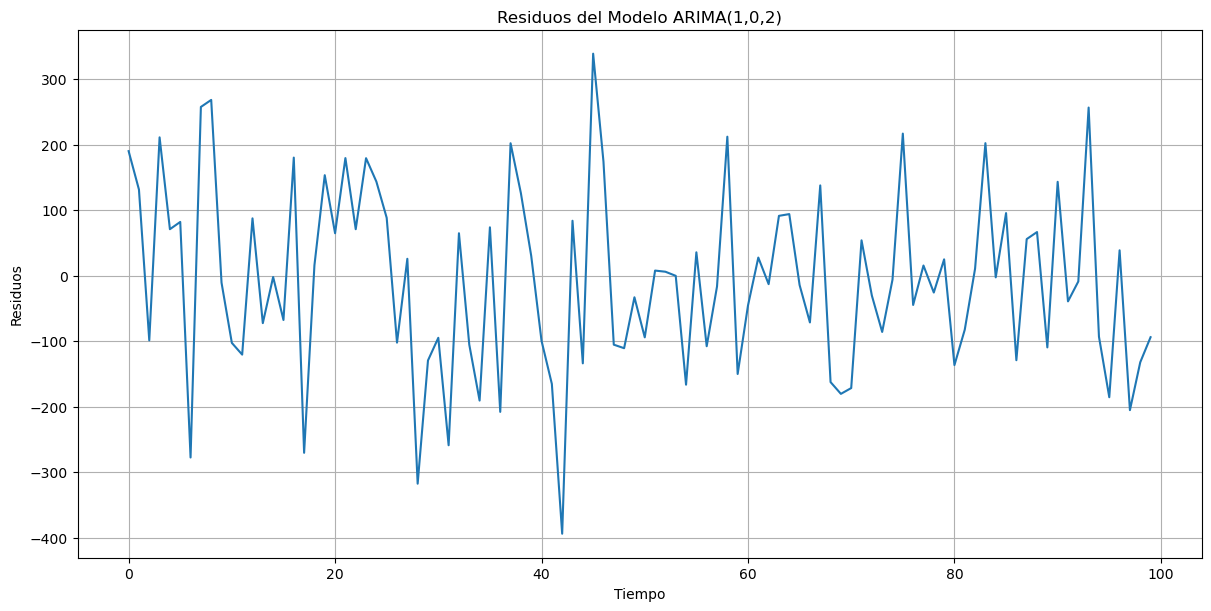

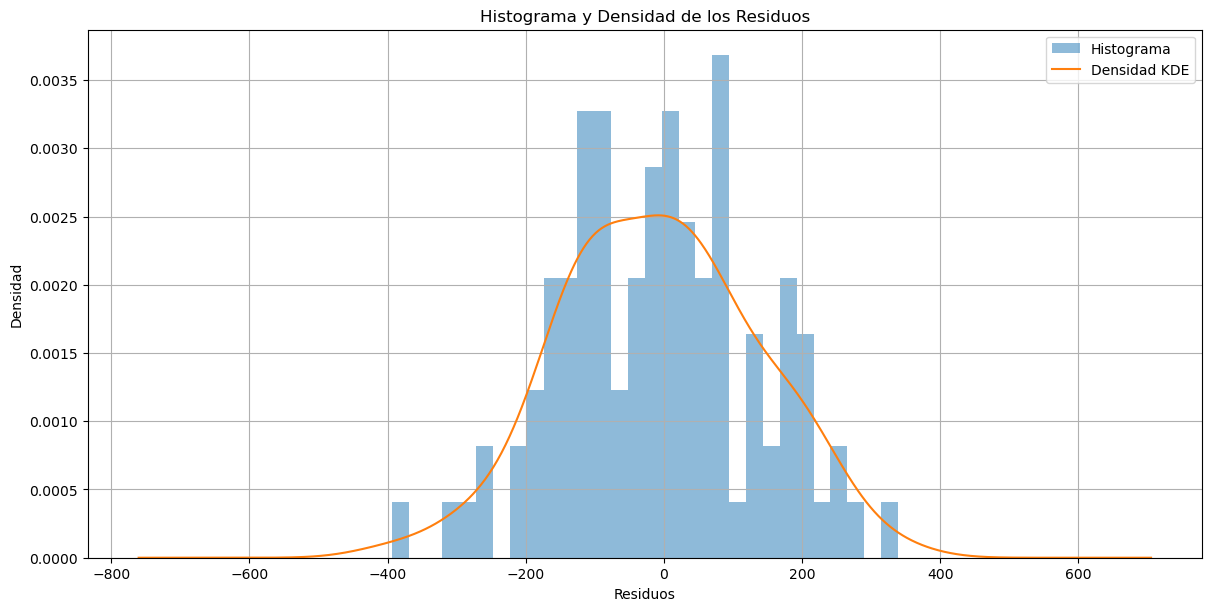

c:\Users\Matias\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


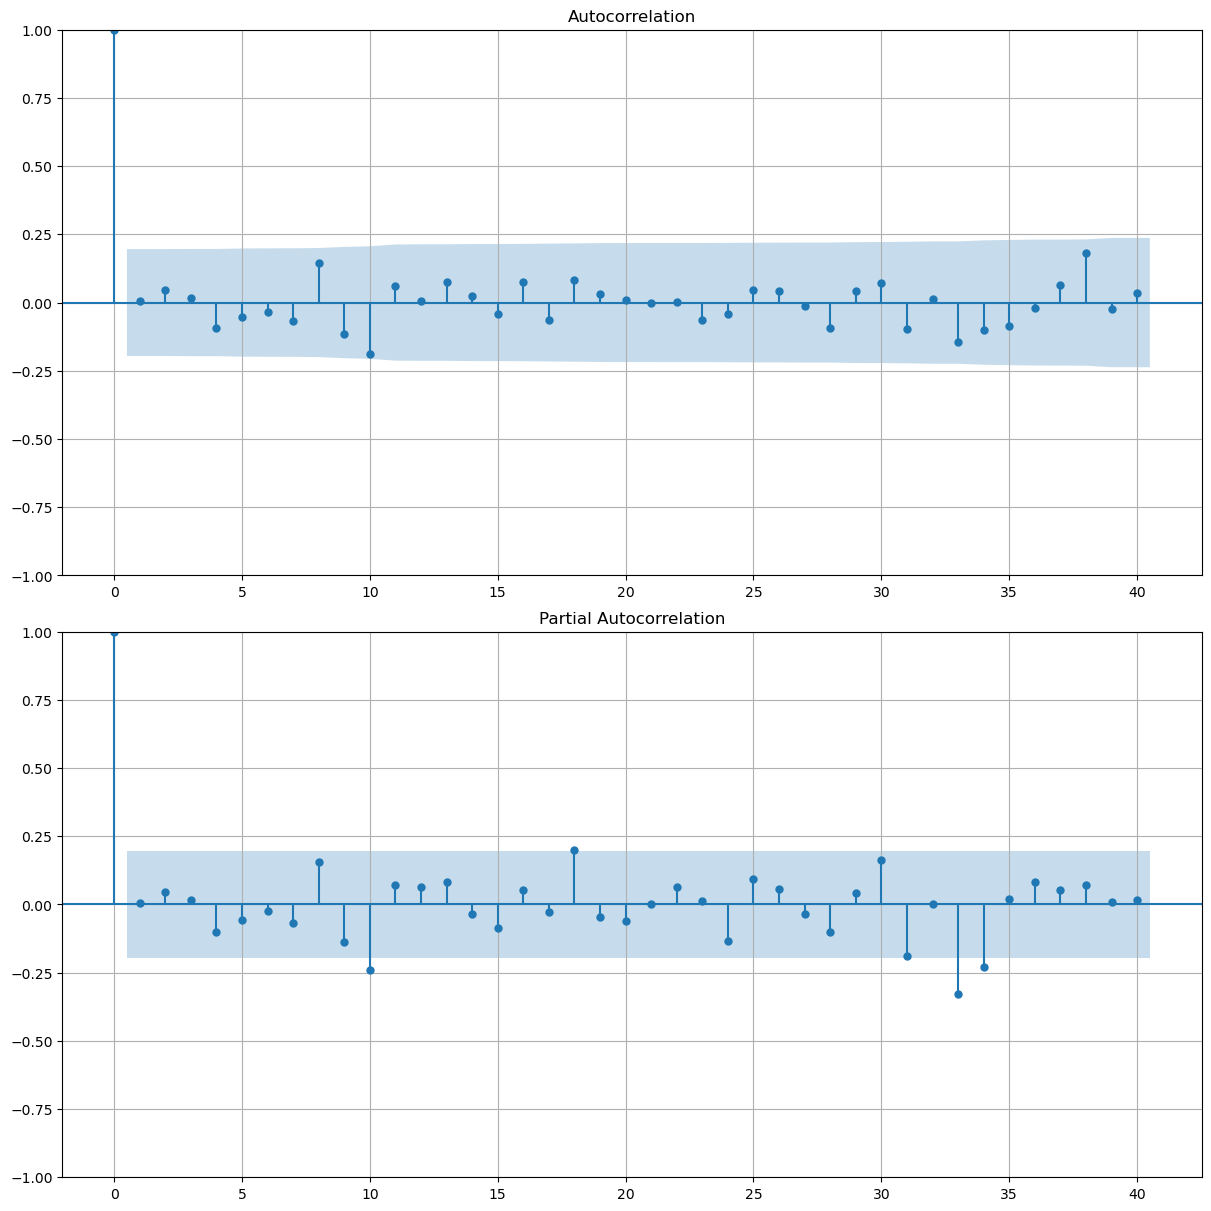

Resultados de la prueba de Ljung-Box:
     lb_stat  lb_pvalue
10  9.991964   0.441199

Resultados de la prueba de Shapiro-Wilk:
ShapiroResult(statistic=0.9930433630943298, pvalue=0.890659749507904)


In [31]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Cargar los datos de la serie temporal del Nilo
nile = sm.datasets.nile.load_pandas().data['volume']

# Ajustar el modelo ARIMA(1,0,2)
model = sm.tsa.ARIMA(nile, order=(1, 0, 2))
results = model.fit()

# Obtener los residuos
residuals = results.resid

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del Modelo ARIMA(1,0,2)')
plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.show()

# Histograma y Densidad de los Residuos
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.5, density=True, label='Histograma')
residuals.plot(kind='kde', label='Densidad KDE')
plt.title('Histograma y Densidad de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# ACF y PACF de los Residuos
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()

# Prueba de Ljung-Box
ljung_box_test = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

# Prueba de Normalidad - Shapiro-Wilk
shapiro_test = shapiro(residuals)

print("Resultados de la prueba de Ljung-Box:")
print(ljung_box_test)

print("\nResultados de la prueba de Shapiro-Wilk:")
print(shapiro_test)


```python
Las conclusiones obtenidas del análisis de los residuos del modelo ARIMA(1,0,2) ajustado a la serie temporal del Nilo son las siguientes:

Residuos en Función del Tiempo:

La gráfica de los residuos en función del tiempo no muestra patrones evidentes ni tendencias, lo que sugiere que el modelo ha capturado adecuadamente la estructura de la serie temporal. Los residuos parecen ser ruido blanco, sin autocorrelaciones significativas.
Histograma y Densidad de los Residuos:

El histograma y la densidad KDE de los residuos indican que la distribución de los residuos es aproximadamente normal. No hay grandes desviaciones de la normalidad, lo que es una buena señal de un buen ajuste del modelo.
ACF y PACF de los Residuos:

Las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) de los residuos no muestran picos significativos fuera del intervalo de confianza, lo que sugiere que no hay autocorrelaciones significativas en los residuos. Esto refuerza la idea de que los residuos son ruido blanco.
Prueba de Ljung-Box:

La prueba de Ljung-Box para 10 rezagos tiene un valor-p de 0.441, lo que indica que no podemos rechazar la hipótesis nula de que los residuos son independientes. En otras palabras, no hay autocorrelaciones significativas en los residuos, lo que confirma que el modelo ha capturado correctamente las dependencias en los datos.
Prueba de Normalidad - Shapiro-Wilk:

La prueba de Shapiro-Wilk tiene un valor-p de 0.891, lo que sugiere que no podemos rechazar la hipótesis nula de que los residuos siguen una distribución normal. Esto apoya la idea de que los residuos tienen una distribución adecuada para un buen modelo ARIMA.
Conclusión General:
El modelo ARIMA(1,0,2) ajustado a la serie temporal del Nilo parece ser un buen modelo. Los residuos del modelo se comportan como ruido blanco, son aproximadamente normales y no presentan autocorrelaciones significativas. Esto indica que el modelo ha capturado adecuadamente la estructura de la serie temporal y que no hay información significativa no modelada en los residuos. Por lo tanto, podemos considerar que el modelo es adecuado para la serie temporal analizada.
```

### 5. Realizar una predicción a 5 años hacia adelante.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Asumiendo que 'nile' es una serie temporal en un DataFrame de pandas
# Ejemplo: nile = pd.Series(data)

# Ajustar el modelo ARIMA (1,0,2)
model = ARIMA(nile, order=(1, 0, 2))
fit3 = model.fit()

# Resumen del modelo
print(fit3.summary())



                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -636.530
Date:                Thu, 04 Jul 2024   AIC                           1283.060
Time:                        17:59:37   BIC                           1296.086
Sample:                    12-31-1871   HQIC                          1288.332
                         - 12-31-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9902     70.759     13.143      0.000     791.305    1068.675
ar.L1          0.9538      0.050     19.000      0.000       0.855       1.052
ma.L1         -0.6046      0.117     -5.187      0.0

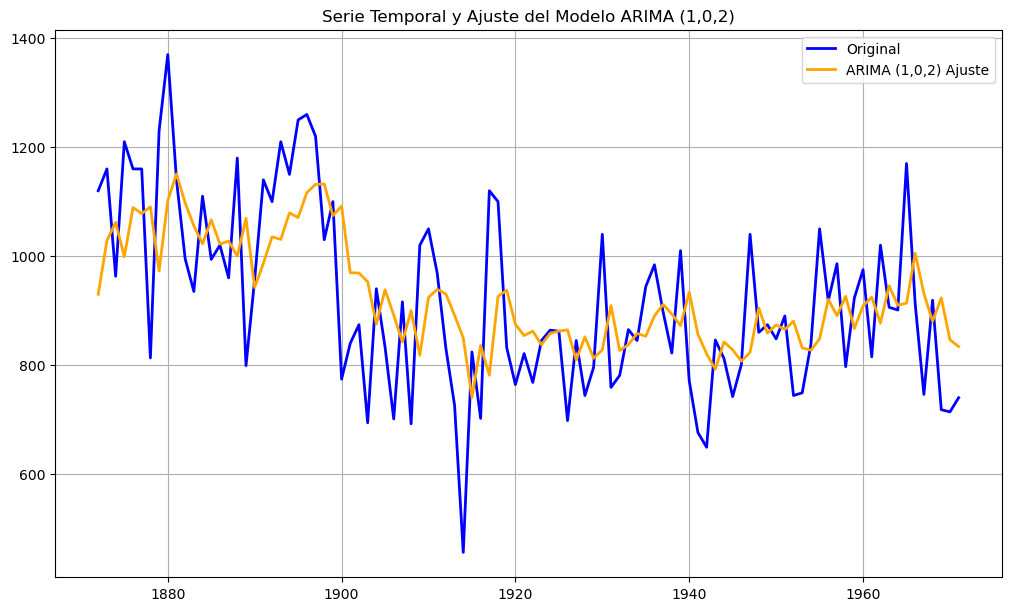

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Asumiendo que 'nile' es una serie temporal en un DataFrame de pandas
# Ejemplo: nile = pd.Series(data, index=pd.date_range(start='1871', periods=len(data), freq='A'))

# Ajustar el modelo ARIMA (1,0,2)
model = ARIMA(nile, order=(1, 0, 2))
fit3 = model.fit()

# Obtener los valores ajustados
ajuste3 = fit3.fittedvalues

# Graficar la serie temporal original y el ajuste del modelo
plt.figure(figsize=(10, 6))
plt.plot(nile, color='blue', linewidth=2, label='Original')
plt.plot(ajuste3, color='orange', linewidth=2, label='ARIMA (1,0,2) Ajuste')
plt.title('Serie Temporal y Ajuste del Modelo ARIMA (1,0,2)')
plt.legend()
plt.show()


In [48]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Asumiendo que 'nile' es una serie temporal en un DataFrame de pandas
# Ejemplo: nile = pd.Series(data, index=pd.date_range(start='1871', periods=len(data), freq='A'))

# Ajustar el modelo ARIMA (1,0,2)
model = ARIMA(nile, order=(1, 0, 2))
fit3 = model.fit()

# Obtener los valores ajustados y los residuos
ajuste3 = fit3.fittedvalues
residuos = nile - ajuste3

# Calcular el desvío estándar de los residuos
desvio_estandar = np.std(residuos)
print("Desvío estándar de los residuos:", desvio_estandar)

# Calcular el RMSE
rmse = np.sqrt(np.mean(residuos**2))
print("Root Mean Square Error (RMSE):", rmse)




Desvío estándar de los residuos: 140.59015117147035
Root Mean Square Error (RMSE): 140.81453577406785


In [54]:
nile.head(150
)


1871-12-31    1120.0
1872-12-31    1160.0
1873-12-31     963.0
1874-12-31    1210.0
1875-12-31    1160.0
               ...  
1966-12-31     746.0
1967-12-31     919.0
1968-12-31     718.0
1969-12-31     714.0
1970-12-31     740.0
Freq: A-DEC, Name: volume, Length: 100, dtype: float64

la prediccion debe partir del ano 1971

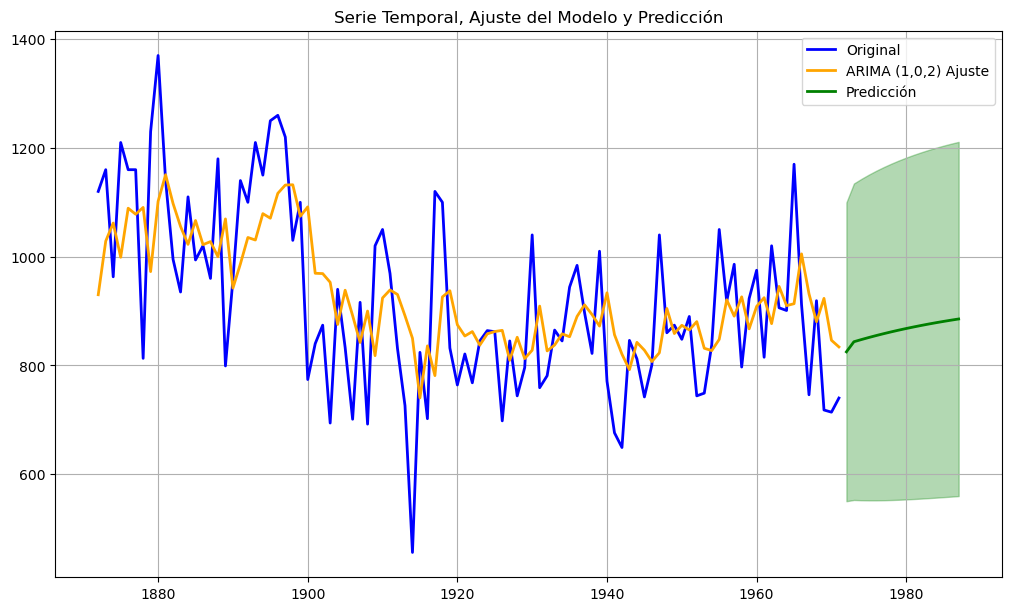

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Asumiendo que 'nile' es una serie temporal en un DataFrame de pandas
# Ejemplo: nile = pd.Series(data, index=pd.date_range(start='1871', periods=len(data), freq='A'))

# Ajustar el modelo ARIMA (1,0,2)
model = ARIMA(nile, order=(1, 0, 2))
fit3 = model.fit()

# Hacer una predicción para los próximos 16 períodos (4 años si los datos son anuales)
pred3 = fit3.get_forecast(steps=16)
pred_ci = pred3.conf_int()

# Graficar la serie temporal original y la predicción
plt.figure(figsize=(10, 6))
plt.plot(nile, color='blue', linewidth=2, label='Original')

# Graficar los valores ajustados
ajuste3 = fit3.fittedvalues
plt.plot(ajuste3, color='orange', linewidth=2, label='ARIMA (1,0,2) Ajuste')

# Graficar la predicción
plt.plot(pred3.predicted_mean, color='green', linewidth=2, label='Predicción')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='green', alpha=0.3)

plt.title('Serie Temporal, Ajuste del Modelo y Predicción')
plt.legend()
plt.show()



### Ejercicio 3

Se considera la serie $x$ de niveles de $CO$, así como la serie $y$ de mortalidad semanal por causas respiratorias. Ambas son parte del objeto `lap` de la biblioteca `astsa`. Ambas series comienzan en $1970$ y tienen una frecuencia semanal (`freq=52`).

1. Analice la correlación cruzada entre ambas series.
2. ¿Para que valor de lag se da la mayor correlación entre ambas?
3. Se propone un modelo de la forma $y_t = \beta_0 + \beta_1 x_{t-l} + w_t$ con $x$ e $y$ como antes y $l$ el lag de la parte anterior. Realice un ajuste lineal para estimar los parámetros $\beta_0$ y $\beta_1$.
4. ¿Cuánto de la varianza de la serie original se explica por la relación entre $x$ e $y$?
5. Realice un gráfico de la predicción del modelo (no olvide que la primera predicción será luego de $l$ lags) y la mortalidad observada. 
6. Analice los residuos del modelo y discuta si aún queda información por ajustar.

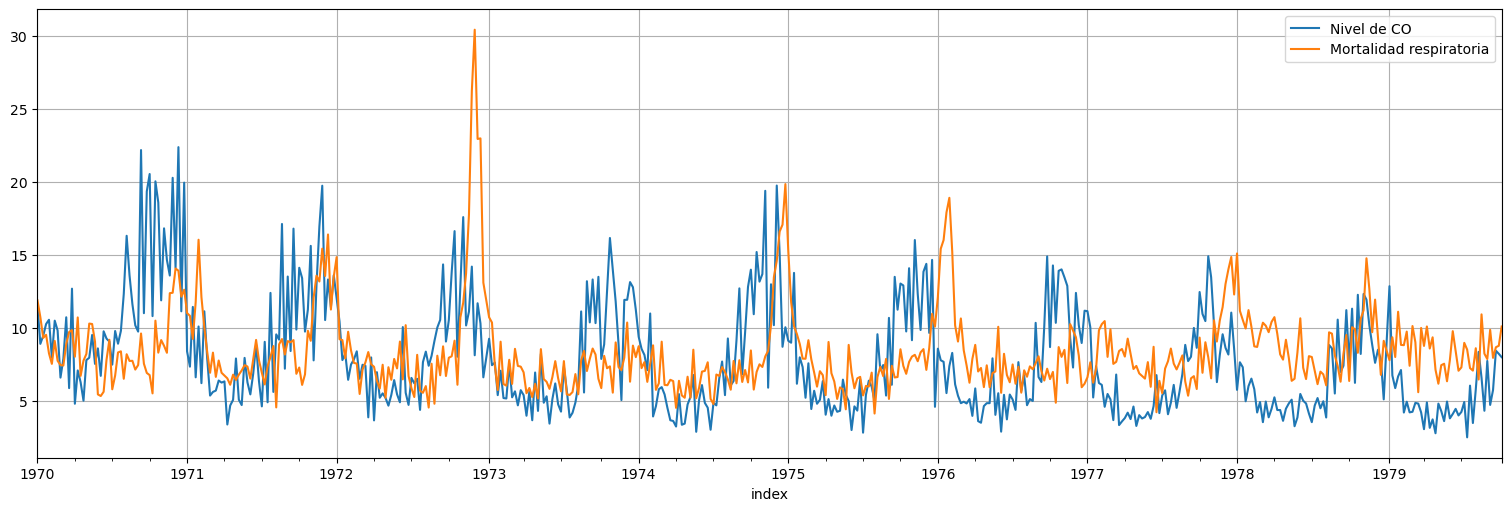

In [9]:
x = astsa.lap["co"]
y = astsa.lap["rmort"]

x.plot(label="Nivel de CO");
y.plot(label="Mortalidad respiratoria");
plt.legend();